Se um cliente faz compras frequentemente, podemos classificar ele como baixo, medio ou alto, pois a frequência do cliente de compras é fácil de categorizar, agora categorizar o perfil do cliente é mais difícil, uma vez que não temos como categorizar o perfil de um cliente, nós utilizamos clusterização para descobrir esse perfil e criar essas categorias. Então utilizar a clusterização para agrupar os clientes com base na similaridade de seus perfis.

In [ ]:
import pandas as pd

In [ ]:
# essa base de dados contém registro de 9 mil clientes e como ele usam seus cartões de créditos
df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv")

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# removendo atributos (colunas)
df.drop(columns=["CUST_ID", "TENURE"], inplace = True)

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [ ]:
# procurando dados faltantes
missing = df.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [ ]:
# substituindo os valores missing para o valor de mediana, não é o valor correto
# mas é um valor próximo
df.fillna(df.median(), inplace=True)
missing = df.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [ ]:
# normalizando os dados para colocar os dados na mesma base de 0 e 1
# é muito importante normalizar os dados
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(df.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [ ]:
# usando o kmeans para clusterizar
from sklearn.cluster import KMeans

In [ ]:
# primeiro passamos o número de cluster, o n_init nos retorna n vezes valores 
# para nos garantir a confiabilidade do algoritmo, então ele roda N vezes e retorna N vezes
# max_iter é o número máximo de interações
kmeans = KMeans(n_clusters = 5, n_init=10, max_iter = 300)
y_pred = kmeans.fit_predict(values)

In [ ]:
# validação do clustering com metrica de validação
# metricas externas e metricas internas
# a externas precisa dos labels, mas não temos
# a internas não precisa de labels, mas é mais complexa
# o primeiro critério da metrica internas é o COMPACTAÇÃO
# quão próximos estão os pontos em um mesmo cluster
# se os pontos dentro de um cluster estiverem muito junto, isso é bom
# significa que o nosso cluster está compactado, ja se tiver muito disperso dentro
# do cluster, significa que não está compactado, então não é bom
# o segundo critério é SEPARAÇÃO
# Quão bem separados estão os pontos em clusters diferentes.
# quanto mais distantes um cluster do outro é melhor, significa que eles estão mais
# divididos, mais classificados

In [ ]:
# usando o coeficiente de sillhouette
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')
print(silhouette)
# como é maior que 0 é um valor bom, pois os valores de silhouette vai de -1 a 1
# Quanto mais próximo de 1 estiver o valor de silhouette mais separados estão os clusters.

0.3645412082353538


Link para saber mais sobre qualidade de agrupamentos:

https://medium.com/@gilneyjnr/qualidade-de-agrupamentos-ci%C3%AAncia-de-dados-4b1176bef5e5

In [ ]:
# Davies bouldin ele mede a qualidade do cluster usando como critério o próprio
# agrupamento do cluster e quanto mais próximo de 0 melhor
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0759109484969387


In [ ]:
# a metrica calinski - Harabasz ele faz a metrica de dispersão dos pontos
# dentro do cluster e os pontos entre os clusters diferentes
# A principal diferença do índice calinski harabasz em relação às outras medidas é o cálculo da variância.

calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3431.794135866532

In [ ]:
# temos 3 metricas até o momento, o sillhouette, davies bouldin e calinski, todas
# elas buscan satisfazer os critérios de compactação e separação dos clusters
# qual é a melhor metrica?
# vamos usar a validação relativa, vamos comparar os valores das metricas
# com configuração diferente do nosso algoritmo de cluster, exemplo: mudando o numero de clusters

In [ ]:
# criando uma função que calcula o numero de cluster no kmeans e ja retorna
# as 3 métricas
def clustering_algoritm(n_clusters, dataset):
  kmeans = KMeans(n_clusters = n_clusters, n_init=10, max_iter = 300)
  labels = kmeans.fit_predict(dataset)

  s = metrics.silhouette_score(dataset, labels, metric = 'euclidean')
  
  dbs = metrics.davies_bouldin_score(dataset, labels)
  
  calinski = metrics.calinski_harabasz_score(dataset, labels)
  return s, dbs, calinski

 usando varias configurações de numero de cluster, percebendos que mais que 10 cluster as metricas ficam horriveis, então temos 3 e 5 cluster, o de 5 cluster as metricas tiveram um melhor resultado, a metrica de silhouette é a metrica mais usada, então vamos tirar ela por base
.

In [ ]:
s1 , dbs1, calinski1 = clustering_algoritm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [ ]:
s2 , dbs2, calinski2 = clustering_algoritm(5, values)
print(s2, dbs2, calinski2)

0.3645055324417282 1.0756856623533981 3431.800717231779


In [ ]:
s3 , dbs3, calinski3 = clustering_algoritm(20, values)
print(s3, dbs3, calinski3)

0.2782365200488237 1.2035114564206846 2416.5380377354772


In [ ]:
# outra validação que podemos fazer é comparar os valores que tivemos com outros
# valores de um conjunto de dados aleatório, assim podemos validar se os nossos
# dados possuem uma melhor métrica e validar se os nossos dados tem uma estrutura
# clusterizada 
# vamos construir uma df com dados aleatorios de 0 e 1 com as mesmas configurações
# do nosso df, vamos usar a mesma quantidade de variáveis=16, mesma quantidade de 
# pontos=clientes
df.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [ ]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algoritm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)
# os nossos dados estão melhor, pois os valores não estão muito similares
# caso os 3 valores das metricas da nossa base de dados aleatória, fosse melhor
# ou similar aos valores da nossa base de dados original
# precisamos rever os nossos dados, técnicas ou configuração do kmeans
# para melhorar isso

0.039695550514838765 3.5083617493556245 306.0625350435103
0.3645055324417282 1.0756856623533981 3431.800717231779


In [ ]:
# validando a estabilidade do cluster
# vamos dividir a base de dados, rodar o kmeans para cada divisão
# e queremos que os resultados das metricas sejam similares

# dividindo o df em 3
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algoritm(5, set1)
print(s1, dbs1, calinski1)

s2, dbs2, calinski2 = clustering_algoritm(5, set2)
print(s2, dbs2, calinski2)

s3, dbs3, calinski3 = clustering_algoritm(5, set3)
print(s3, dbs3, calinski3)

# nossas partes são estaveis, pois os valores são bem similares

0.3692455604046628 1.0550439720459237 1203.9722444846886
0.3539831746159207 1.1396268152633489 1194.9384641787258
0.36704573758244236 1.0990426578873271 1167.5322875560998


In [ ]:
# usando gráficos para interpretar as métricas
# como temos 16 atributos, precisamos selecionar 2 desses 16, para construir
# um gráfico de 2 dimenssões 

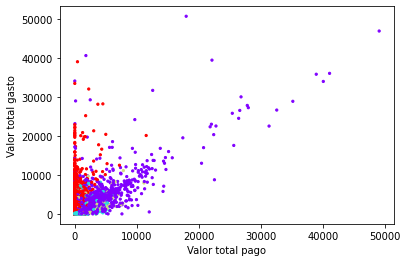

In [ ]:
import matplotlib.pyplot as plt
# s = 5 significa o tamanho dos pontos, cmap é o esquema de cores
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=labels, s=5, cmap = 'rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

# oque da para interpretar é, que temos 5 cluster mas só 2 se sobre sai
# o valor gasto do cliente que está em vermelho tende a fazer uma linha
# na vertical que não está acompanhando o valor pago dos clientes, isso representa
# os clientes que gastaram mais e não pagaram ou pagaram o minimo da fatura
# o cluster roxo que tem o crescimento na diagonal, significa que são os cliente
# que conforme gasta, vai pagando a fatura compativelmente 

In [ ]:
# já que conseguimos ver de 2 em 2, devido que o gráfico é só de 2 dimenssão
# vamos plotar então de 2 em 2
import seaborn as sns
df["cluster"] = labels
# hue significa a coluna que vai dar as cores
sns.pairplot(df[0:], hue = "cluster")

In [ ]:
# como a visualização não deu muito certo para interpretar todos os atributos
# vamos pelos valores estatisticos 
df.groupby("cluster").describe()

# até indo para parte estatística é difícil, pois temos muitos atributos
# então para resolver precisamos pegar os atributos com a maior representatividade

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1536.0  1141.865757  1664.809840   0.000000   212.178230   
1        3280.0   443.746756   846.398201   0.000000    23.365333   
2        1073.0  1795.328292  1982.485775   0.000000   507.076999   
3        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
4         412.0  1987.146873  1852.215743  70.794108  1020.146724   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         554.332740  1370.056708  19043.138560            1536.0  0.928220   
1          82.941478   410.126095   9630.367575            3280.0  0.774389   
2        1088.056301  2315.003636  14581.459140            1073.0  0.862260   
3        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
4        1338.918346  2133.415063  11670.179850             412.0  0.989512   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       523.540210  18621.013310           1536.0  0.278331   
1        ...       248.733727   4483.503862           3280.0  0.246806   
2        ...       884.183626  21235.065300           1073.0  0.117430   
3        ...      1330.593643   8345.641905           2649.0  0.001799   
4        ...      7086.774783  76406.207520            412.0  0.019271   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.367137  0.0  0.0  0.083333  0.545455  1.0  
1        0.346748  0.0  0.0  0.000000  0.444444  1.0  
2        0.186772  0.0  0.0  0.083333  0.142857  1.0  
3        0.023260  0.0  0.0  0.000000  0.000000  0.6  
4        0.090795  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [ ]:
# para se basear, a gente vai pegar os centroides dos cluters
centroids = kmeans.cluster_centers_
print(centroids)
# cada lista tem os 16 atributo de cada clusters
# vamos olhas a variancia dos centroids para um atributo especifico
# exemplo: o primeiro atributo de cada cluster são bem diferente, já o segundo 
# atributo, tem valores similares e queremos os atributos com valores diferentes
# para explicar as diferenças entre os clusters
# então vamos calcular a variância para cada atributo e aqueles que tiverem 
# a maior variância, vamos selecionar 

[[1.59872633e-01 2.45335780e-04 4.38628565e-01 2.57276648e-01
  1.81523763e-01 2.58896564e-02 2.04405504e-04 8.91003532e-05
  1.50573918e-04 9.39953463e-06 1.70012472e-04 6.17608469e-03
  6.03886132e-01 4.02529446e-01 8.52570022e-02 7.19925505e-05]
 [6.90890221e-02 2.30787435e-04 1.21507361e-01 4.79670320e-02
  7.36405575e-02 2.43310654e-02 1.72863102e-04 3.36686718e-05
  1.40328311e-04 7.92341768e-06 1.23962309e-04 2.86381277e-03
  9.43564102e-01 1.53799817e-01 5.68529799e-02 7.61493366e-05]
 [2.35130689e-01 2.16418717e-04 6.04525670e-02 3.44569238e-02
  2.60008529e-02 3.99755165e-01 5.26563547e-05 2.05235176e-05
  3.52245850e-05 6.54254245e-05 1.57052528e-03 1.12425758e-03
  5.35275552e-01 5.98057989e-01 1.04294158e-01 2.77348362e-05]
 [5.04263792e-01 2.72194282e-04 6.17808431e-02 3.62269020e-02
  2.55756543e-02 2.52903017e-01 6.73170559e-05 2.56975193e-05
  4.50651626e-05 5.74388410e-05 1.15687334e-03 1.33194105e-03
  7.19174706e-01 1.66205262e-01 1.79245673e-01 5.52303554e-07]
 [3.

In [ ]:
max = len(centroids[0])
for i in range(max):
  print(df.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0542
PRC_FULL_PAYMENT 
0.0000


In [ ]:
# selecionando os atributos com a segunda unidade após casa decimal maior que 0
# e dps verificar se cada atribudo faz sentindo entre eles
# limite disponivel BALANCE 0.0297
# valor total de compras PURCHASES 0.0214
# valor total de saques CASH_ADVANCE 0.0359
# limite de credito total CREDIT_LIMIT 0.0202
# valor total pago PAYMENTS 0.0140

In [ ]:
# olhando as estatística de cada atributo selecionado anteriormente
description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
# relacionando os artibutos pela quantidade de cliente dentro do cluster
# size vai me dar o numero de cluster que eu tenho
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1141.865757  3274.071901    183.496011   4098.802182  3037.137165   
1         443.746756   629.249107    141.482978   5130.547795   814.294226   
2        1795.328292   476.810531   3267.199032   3982.452201  4713.384730   
3        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
4        1987.146873   858.326286    420.107194   2226.699029  1338.974045   

         n_clients  
cluster             
0             1536  
1             3280  
2             1073  
3             2649  
4              412  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
# aqui é só um método subjetivo de observação das estatística, você a nota as caracteristcas
# de cada registro dos cluster, um exemplo a baixo
# CLUSTER 0: Clientes com os menores valores em gastos.
# CLUSTER 1: Clientes com os maiores valores em gastos. Menor valor em compras.
# CLUSTER 2: Clientes que gastam muito com saques, melhores pagadores 
# CLUSTER 3: Clientes padrão, piores pagadores

In [ ]:
# o percentual de pagamento do cliente
df.groupby("cluster")['PRC_FULL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1536.0,0.278331,0.367137,0.0,0.0,0.083333,0.545455,1.0
1,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
2,1073.0,0.117430,0.186772,0.0,0.0,0.083333,0.142857,1.0
3,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
4,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0


In [ ]:
# agora como utilizar os cluster?
# a gente tirou conclusões sobre cada clusters, assim podemos aplicar uma regra
# de negócio em um cluster especifico 
# e como saber se o cluster está bom, que todas as analise foi boa
# pegamos um cluster que queremos aplicar uma regra de negócio e divimos em
# o grupo de controle e o grupo de teste e durante um tempo especifico, 
# aplicamos a regra de negócio só no grupo de teste, se o grupo de teste tiver
# o mesmo resultado que o grupo de controle que só agíl naturalmente, então a
# analise do nosso cluster foi ruím, agr se tiver resultados significativos positivos
# então demos uma boa analise
# e para fazer essa divisão, os nosso clientes tenham que ter caracteristicas bem
# similares, então leva um tempo para analisar essa divisão